## Sales Prediction using Python

**Name: Gouri Chavan**

#### Importing libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# importing the data
df = pd.read_csv(r"C:\Users\Dell\Downloads\archive (7)\Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 5)

 To estimate the advertising fees spent on TV ads based on product sales.

In [5]:
X = df[["TV"]]
y = df[["Sales"]]

In [6]:
# Model
reg_model = LinearRegression().fit(X, y)

# constant (b - bias)
b = reg_model.intercept_[0]

# coefficient of TV (M)
M = reg_model.coef_[0][0]

print("Linear regression parameters at : b = {0}, M = {1}".format(b, M))

Linear regression parameters at : b = 7.032593549127694, M = 0.04753664043301976


### Prediction

The most common use of regression analysis is to predict future opportunities and threats.<br>
For this example, let's estimate what the sales would be if there were 200 units of spending on TV ads.

In [7]:
reg_model.intercept_[0] + reg_model.coef_[0][0] * 200

16.539921635731645

In [8]:
# Functional:
new_data = [200]

new_data = pd.DataFrame(new_data,columns=['TV'])


reg_model.predict(new_data)

array([[16.53992164]])

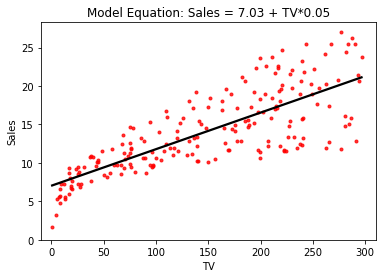

In [9]:
# Visualization of the Model
g = sns.regplot(x=X, y=y, scatter_kws={'color': 'r', 's': 9},
                ci=False, color="k")
g.set_title(f"Model Equation: Sales = {round(reg_model.intercept_[0], 2)} + TV*{round(reg_model.coef_[0][0], 2)}")
g.set_ylabel("Sales")
g.set_xlabel("TV")
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()

In [10]:
# MSE
y_pred = reg_model.predict(X)
mean_squared_error(y, y_pred)

10.512652915656759

In [11]:
# RMSE
np.sqrt(mean_squared_error(y, y_pred))

3.2423221486546887

In [12]:
# MAE
mean_absolute_error(y, y_pred)

2.549806038927486

In [13]:
# R-squared
reg_model.score(X, y)

0.611875050850071

### Multiple Linear Regression
Multiple linear regression is used to estimate the relationship between two or more independent variables and one dependent variable.

In [14]:
X = df[['TV','Radio','Newspaper']]
y = df[["Sales"]]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20, random_state=1)

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# constant (b - bias)
reg_model.intercept_

# coefficients (w - weights)
reg_model.coef_


array([[0.0468431 , 0.17854434, 0.00258619]])

### Prediction
If the values are:

TV: 30<br>
radio: 10<br>
newspaper: 40

In [16]:
new_data = [[30], [10], [40]]

new_data = pd.DataFrame(new_data).T
new_data.columns =['TV', 'Radio', 'Newspaper']

reg_model.predict(new_data)

array([[6.202131]])

### Evaluating Forecast Success

In [17]:
# Train RMSE
y_pred = reg_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

1.7369025901470925

In [18]:
# TRAIN Rsquared
reg_model.score(X_train, y_train)

0.8959372632325174

In [19]:
# Test RMSE
y_pred = reg_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

1.4113417558581587

In [20]:
# Test RKARE
reg_model.score(X_test, y_test)

0.8927605914615384

## Thank you